In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('D:/데이터/IGAWorks/frequency_encoding_data_no_drop.csv')

In [3]:
data.head()

,click,event_datetime,bid_id,age,marry,predicted_house_price,day,hour,holiday,placement_type_WnrXFsYXNs,...,device_os_version_encode,device_model_encode,device_carrier_encode,device_make_encode,device_language_encode,device_region_encode,device_city_encode,advertisement_id_encode,install_pack_encode,cate_code_encode
0,0,2019-10-01 00:00:05.289,aAEDD9AeIv,8,0,10000.0,1,0,0,0,...,0.300569,0.302844,0.396518,0.529674,0.346448,0.635845,0.626661,0.044477,0.000002,0.000002
1,0,2019-10-02 01:50:55.776,120KZBpPEp,8,0,10000.0,2,1,0,0,...,0.300569,0.302844,0.396518,0.529674,0.346448,0.635845,0.626661,0.044477,0.000002,0.000002
2,0,2019-10-03 07:30:56.756,AMFiNF3X7r,8,0,10000.0,3,7,1,0,...,0.300569,0.302844,0.396518,0.529674,0.346448,0.635845,0.626661,0.044477,0.000002,0.000002
3,0,2019-10-07 00:15:31.816,Mza3hx3DOX,8,0,10000.0,7,0,0,0,...,0.084223,0.094481,0.212653,0.413243,0.651317,0.006898,0.005312,0.031688,0.000002,0.000002
4,0,2019-10-09 15:01:40.412,4GbWwwNnJZ,8,0,10000.0,9,15,1,0,...,0.300569,0.302844,0.396518,0.529674,0.346448,0.635845,0.626661,0.044477,0.000002,0.000002


In [4]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232370 entries, 0 to 2232369
Data columns (total 42 columns):
click                                int64
event_datetime                       object
bid_id                               object
age                                  int64
marry                                int64
predicted_house_price                float64
day                                  int64
hour                                 int64
holiday                              int64
placement_type_WnrXFsYXNs            int64
placement_type_kIeE1J0KCa            int64
placement_type_tg9mzu7kFm            int64
gender_M                             int64
day_of_week_Monday                   int64
day_of_week_Saturday                 int64
day_of_week_Sunday                   int64
day_of_week_Thursday                 int64
day_of_week_Tuesday                  int64
day_of_week_Wednesday                int64
device_connection_type_WCK2G73H3A    int64
device_connection_type_

In [6]:
train = df[df['day'].isin(list(range(1,10)))]
test = df[df['day'] == 10]

In [7]:
X_train = train.iloc[:, 3:]
X_test = test.iloc[:, 3:]
y_train = train['click']
y_test = test['click']

In [8]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1978127, 39)
Number transactions y_train dataset:  (1978127,)
Number transactions X_test dataset:  (254243, 39)
Number transactions y_test dataset:  (254243,)


### model1

In [9]:
import lightgbm

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction':  0.2319,
    'bagging_fraction': 0.8,
    'bagging_freq': 20,
    'verbose': 0,
    'max_bin': 500,
    'num_iterations': 500,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10,
    'random_state': 42
}

model1= lightgbm.LGBMClassifier(**params)

eval_set = [(X_train, y_train), (X_test, y_test)]
model1.fit(X_train, y_train, eval_metric="logloss", eval_set=eval_set, verbose=True)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.284792	training's binary_logloss: 0.284792	valid_1's binary_logloss: 0.297671	valid_1's binary_logloss: 0.297671
[2]	training's binary_logloss: 0.275494	training's binary_logloss: 0.275494	valid_1's binary_logloss: 0.28905	valid_1's binary_logloss: 0.28905
[3]	training's binary_logloss: 0.268324	training's binary_logloss: 0.268324	valid_1's binary_logloss: 0.281985	valid_1's binary_logloss: 0.281985
[4]	training's binary_logloss: 0.262777	training's binary_logloss: 0.262777	valid_1's binary_logloss: 0.276636	valid_1's binary_logloss: 0.276636
[5]	training's binary_logloss: 0.258383	training's binary_logloss: 0.258383	valid_1's binary_logloss: 0.272439	valid_1's binary_logloss: 0.272439
[6]	training's binary_logloss: 0.254814	training's binary_logloss: 0.254814	valid_1's binary_logloss: 0.268991	valid_1's binary_logloss: 0.268991
[7]	training's binary_logloss: 0.251795	training's binary_logloss: 0.251795	valid_1's binary_logloss: 0.266149	valid_1's binar

[57]	training's binary_logloss: 0.231569	training's binary_logloss: 0.231569	valid_1's binary_logloss: 0.249446	valid_1's binary_logloss: 0.249446
[58]	training's binary_logloss: 0.231509	training's binary_logloss: 0.231509	valid_1's binary_logloss: 0.249419	valid_1's binary_logloss: 0.249419
[59]	training's binary_logloss: 0.231462	training's binary_logloss: 0.231462	valid_1's binary_logloss: 0.24941	valid_1's binary_logloss: 0.24941
[60]	training's binary_logloss: 0.231391	training's binary_logloss: 0.231391	valid_1's binary_logloss: 0.249361	valid_1's binary_logloss: 0.249361
[61]	training's binary_logloss: 0.231337	training's binary_logloss: 0.231337	valid_1's binary_logloss: 0.249325	valid_1's binary_logloss: 0.249325
[62]	training's binary_logloss: 0.231305	training's binary_logloss: 0.231305	valid_1's binary_logloss: 0.249292	valid_1's binary_logloss: 0.249292
[63]	training's binary_logloss: 0.231229	training's binary_logloss: 0.231229	valid_1's binary_logloss: 0.249237	valid_1'

[113]	training's binary_logloss: 0.229545	training's binary_logloss: 0.229545	valid_1's binary_logloss: 0.248161	valid_1's binary_logloss: 0.248161
[114]	training's binary_logloss: 0.229519	training's binary_logloss: 0.229519	valid_1's binary_logloss: 0.248137	valid_1's binary_logloss: 0.248137
[115]	training's binary_logloss: 0.229497	training's binary_logloss: 0.229497	valid_1's binary_logloss: 0.248129	valid_1's binary_logloss: 0.248129
[116]	training's binary_logloss: 0.229477	training's binary_logloss: 0.229477	valid_1's binary_logloss: 0.248127	valid_1's binary_logloss: 0.248127
[117]	training's binary_logloss: 0.229458	training's binary_logloss: 0.229458	valid_1's binary_logloss: 0.248124	valid_1's binary_logloss: 0.248124
[118]	training's binary_logloss: 0.229436	training's binary_logloss: 0.229436	valid_1's binary_logloss: 0.248118	valid_1's binary_logloss: 0.248118
[119]	training's binary_logloss: 0.229411	training's binary_logloss: 0.229411	valid_1's binary_logloss: 0.248102

[170]	training's binary_logloss: 0.228381	training's binary_logloss: 0.228381	valid_1's binary_logloss: 0.247662	valid_1's binary_logloss: 0.247662
[171]	training's binary_logloss: 0.22836	training's binary_logloss: 0.22836	valid_1's binary_logloss: 0.247659	valid_1's binary_logloss: 0.247659
[172]	training's binary_logloss: 0.228344	training's binary_logloss: 0.228344	valid_1's binary_logloss: 0.247656	valid_1's binary_logloss: 0.247656
[173]	training's binary_logloss: 0.228329	training's binary_logloss: 0.228329	valid_1's binary_logloss: 0.247645	valid_1's binary_logloss: 0.247645
[174]	training's binary_logloss: 0.228313	training's binary_logloss: 0.228313	valid_1's binary_logloss: 0.24764	valid_1's binary_logloss: 0.24764
[175]	training's binary_logloss: 0.228295	training's binary_logloss: 0.228295	valid_1's binary_logloss: 0.247634	valid_1's binary_logloss: 0.247634
[176]	training's binary_logloss: 0.228276	training's binary_logloss: 0.228276	valid_1's binary_logloss: 0.247633	val

[226]	training's binary_logloss: 0.227437	training's binary_logloss: 0.227437	valid_1's binary_logloss: 0.247375	valid_1's binary_logloss: 0.247375
[227]	training's binary_logloss: 0.227425	training's binary_logloss: 0.227425	valid_1's binary_logloss: 0.247376	valid_1's binary_logloss: 0.247376
[228]	training's binary_logloss: 0.227409	training's binary_logloss: 0.227409	valid_1's binary_logloss: 0.247372	valid_1's binary_logloss: 0.247372
[229]	training's binary_logloss: 0.227393	training's binary_logloss: 0.227393	valid_1's binary_logloss: 0.247363	valid_1's binary_logloss: 0.247363
[230]	training's binary_logloss: 0.22738	training's binary_logloss: 0.22738	valid_1's binary_logloss: 0.24736	valid_1's binary_logloss: 0.24736
[231]	training's binary_logloss: 0.227362	training's binary_logloss: 0.227362	valid_1's binary_logloss: 0.247362	valid_1's binary_logloss: 0.247362
[232]	training's binary_logloss: 0.227347	training's binary_logloss: 0.227347	valid_1's binary_logloss: 0.247363	val

[283]	training's binary_logloss: 0.226695	training's binary_logloss: 0.226695	valid_1's binary_logloss: 0.247181	valid_1's binary_logloss: 0.247181
[284]	training's binary_logloss: 0.226677	training's binary_logloss: 0.226677	valid_1's binary_logloss: 0.247178	valid_1's binary_logloss: 0.247178
[285]	training's binary_logloss: 0.226664	training's binary_logloss: 0.226664	valid_1's binary_logloss: 0.247175	valid_1's binary_logloss: 0.247175
[286]	training's binary_logloss: 0.226651	training's binary_logloss: 0.226651	valid_1's binary_logloss: 0.247177	valid_1's binary_logloss: 0.247177
[287]	training's binary_logloss: 0.22664	training's binary_logloss: 0.22664	valid_1's binary_logloss: 0.247171	valid_1's binary_logloss: 0.247171
[288]	training's binary_logloss: 0.226626	training's binary_logloss: 0.226626	valid_1's binary_logloss: 0.247168	valid_1's binary_logloss: 0.247168
[289]	training's binary_logloss: 0.226608	training's binary_logloss: 0.226608	valid_1's binary_logloss: 0.247159	v

[340]	training's binary_logloss: 0.225979	training's binary_logloss: 0.225979	valid_1's binary_logloss: 0.246989	valid_1's binary_logloss: 0.246989
[341]	training's binary_logloss: 0.225965	training's binary_logloss: 0.225965	valid_1's binary_logloss: 0.246983	valid_1's binary_logloss: 0.246983
[342]	training's binary_logloss: 0.225947	training's binary_logloss: 0.225947	valid_1's binary_logloss: 0.246975	valid_1's binary_logloss: 0.246975
[343]	training's binary_logloss: 0.225936	training's binary_logloss: 0.225936	valid_1's binary_logloss: 0.246986	valid_1's binary_logloss: 0.246986
[344]	training's binary_logloss: 0.225921	training's binary_logloss: 0.225921	valid_1's binary_logloss: 0.24698	valid_1's binary_logloss: 0.24698
[345]	training's binary_logloss: 0.225906	training's binary_logloss: 0.225906	valid_1's binary_logloss: 0.246976	valid_1's binary_logloss: 0.246976
[346]	training's binary_logloss: 0.225897	training's binary_logloss: 0.225897	valid_1's binary_logloss: 0.246974	v

[397]	training's binary_logloss: 0.225299	training's binary_logloss: 0.225299	valid_1's binary_logloss: 0.246911	valid_1's binary_logloss: 0.246911
[398]	training's binary_logloss: 0.225288	training's binary_logloss: 0.225288	valid_1's binary_logloss: 0.246907	valid_1's binary_logloss: 0.246907
[399]	training's binary_logloss: 0.22528	training's binary_logloss: 0.22528	valid_1's binary_logloss: 0.246906	valid_1's binary_logloss: 0.246906
[400]	training's binary_logloss: 0.225272	training's binary_logloss: 0.225272	valid_1's binary_logloss: 0.246908	valid_1's binary_logloss: 0.246908
[401]	training's binary_logloss: 0.225264	training's binary_logloss: 0.225264	valid_1's binary_logloss: 0.246911	valid_1's binary_logloss: 0.246911
[402]	training's binary_logloss: 0.225254	training's binary_logloss: 0.225254	valid_1's binary_logloss: 0.246906	valid_1's binary_logloss: 0.246906
[403]	training's binary_logloss: 0.225243	training's binary_logloss: 0.225243	valid_1's binary_logloss: 0.246909	v

[454]	training's binary_logloss: 0.224663	training's binary_logloss: 0.224663	valid_1's binary_logloss: 0.24676	valid_1's binary_logloss: 0.24676
[455]	training's binary_logloss: 0.224655	training's binary_logloss: 0.224655	valid_1's binary_logloss: 0.246762	valid_1's binary_logloss: 0.246762
[456]	training's binary_logloss: 0.224643	training's binary_logloss: 0.224643	valid_1's binary_logloss: 0.246756	valid_1's binary_logloss: 0.246756
[457]	training's binary_logloss: 0.224634	training's binary_logloss: 0.224634	valid_1's binary_logloss: 0.246759	valid_1's binary_logloss: 0.246759
[458]	training's binary_logloss: 0.224626	training's binary_logloss: 0.224626	valid_1's binary_logloss: 0.24676	valid_1's binary_logloss: 0.24676
[459]	training's binary_logloss: 0.224617	training's binary_logloss: 0.224617	valid_1's binary_logloss: 0.246762	valid_1's binary_logloss: 0.246762
[460]	training's binary_logloss: 0.224608	training's binary_logloss: 0.224608	valid_1's binary_logloss: 0.246765	val

LGBMClassifier(bagging_fraction=0.8, bagging_freq=20, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.2319,
               importance_type='split', learning_rate=0.1, max_bin=500,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=10, min_split_gain=0.0,
               min_sum_hessian_in_leaf=10, n_estimators=100, n_jobs=-1,
               num_iterations=500, num_leaves=50, objective='binary',
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               verbose=0)

In [10]:
from sklearn.metrics import log_loss

lg_loan_status_probas = model1.predict_proba(X_test)
lg_log_loss = log_loss(y_test, lg_loan_status_probas)
print(lg_log_loss)

0.24667824597071022


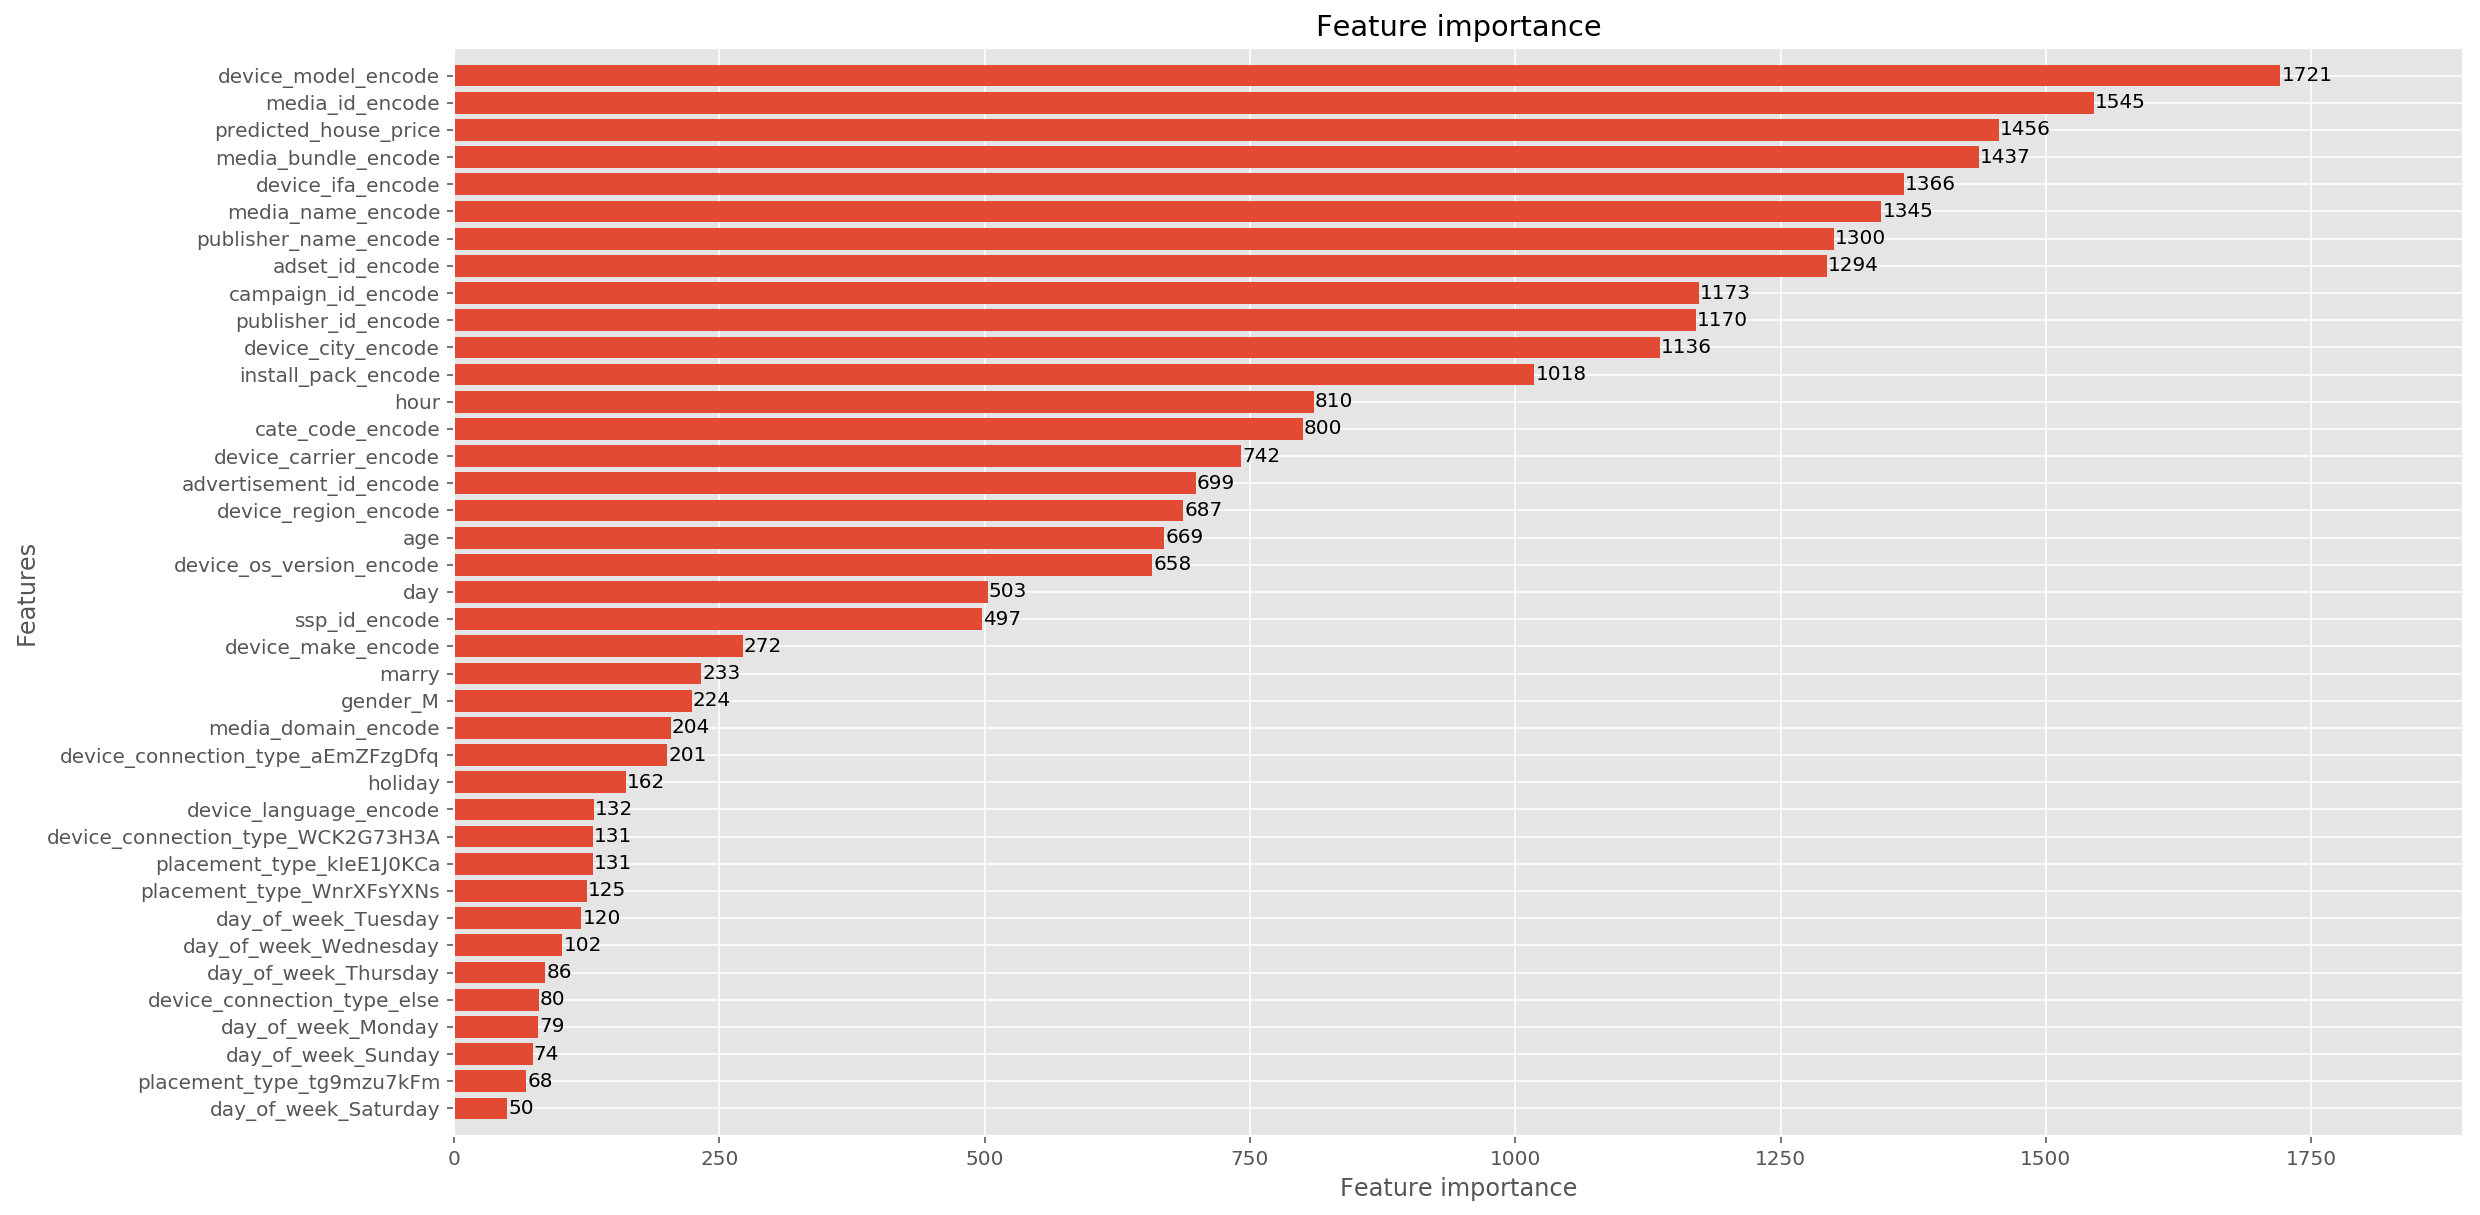

In [11]:
lightgbm.plot_importance(model1, max_num_features  = 100, ignore_zero=True, figsize = (18, 10), height=0.8)

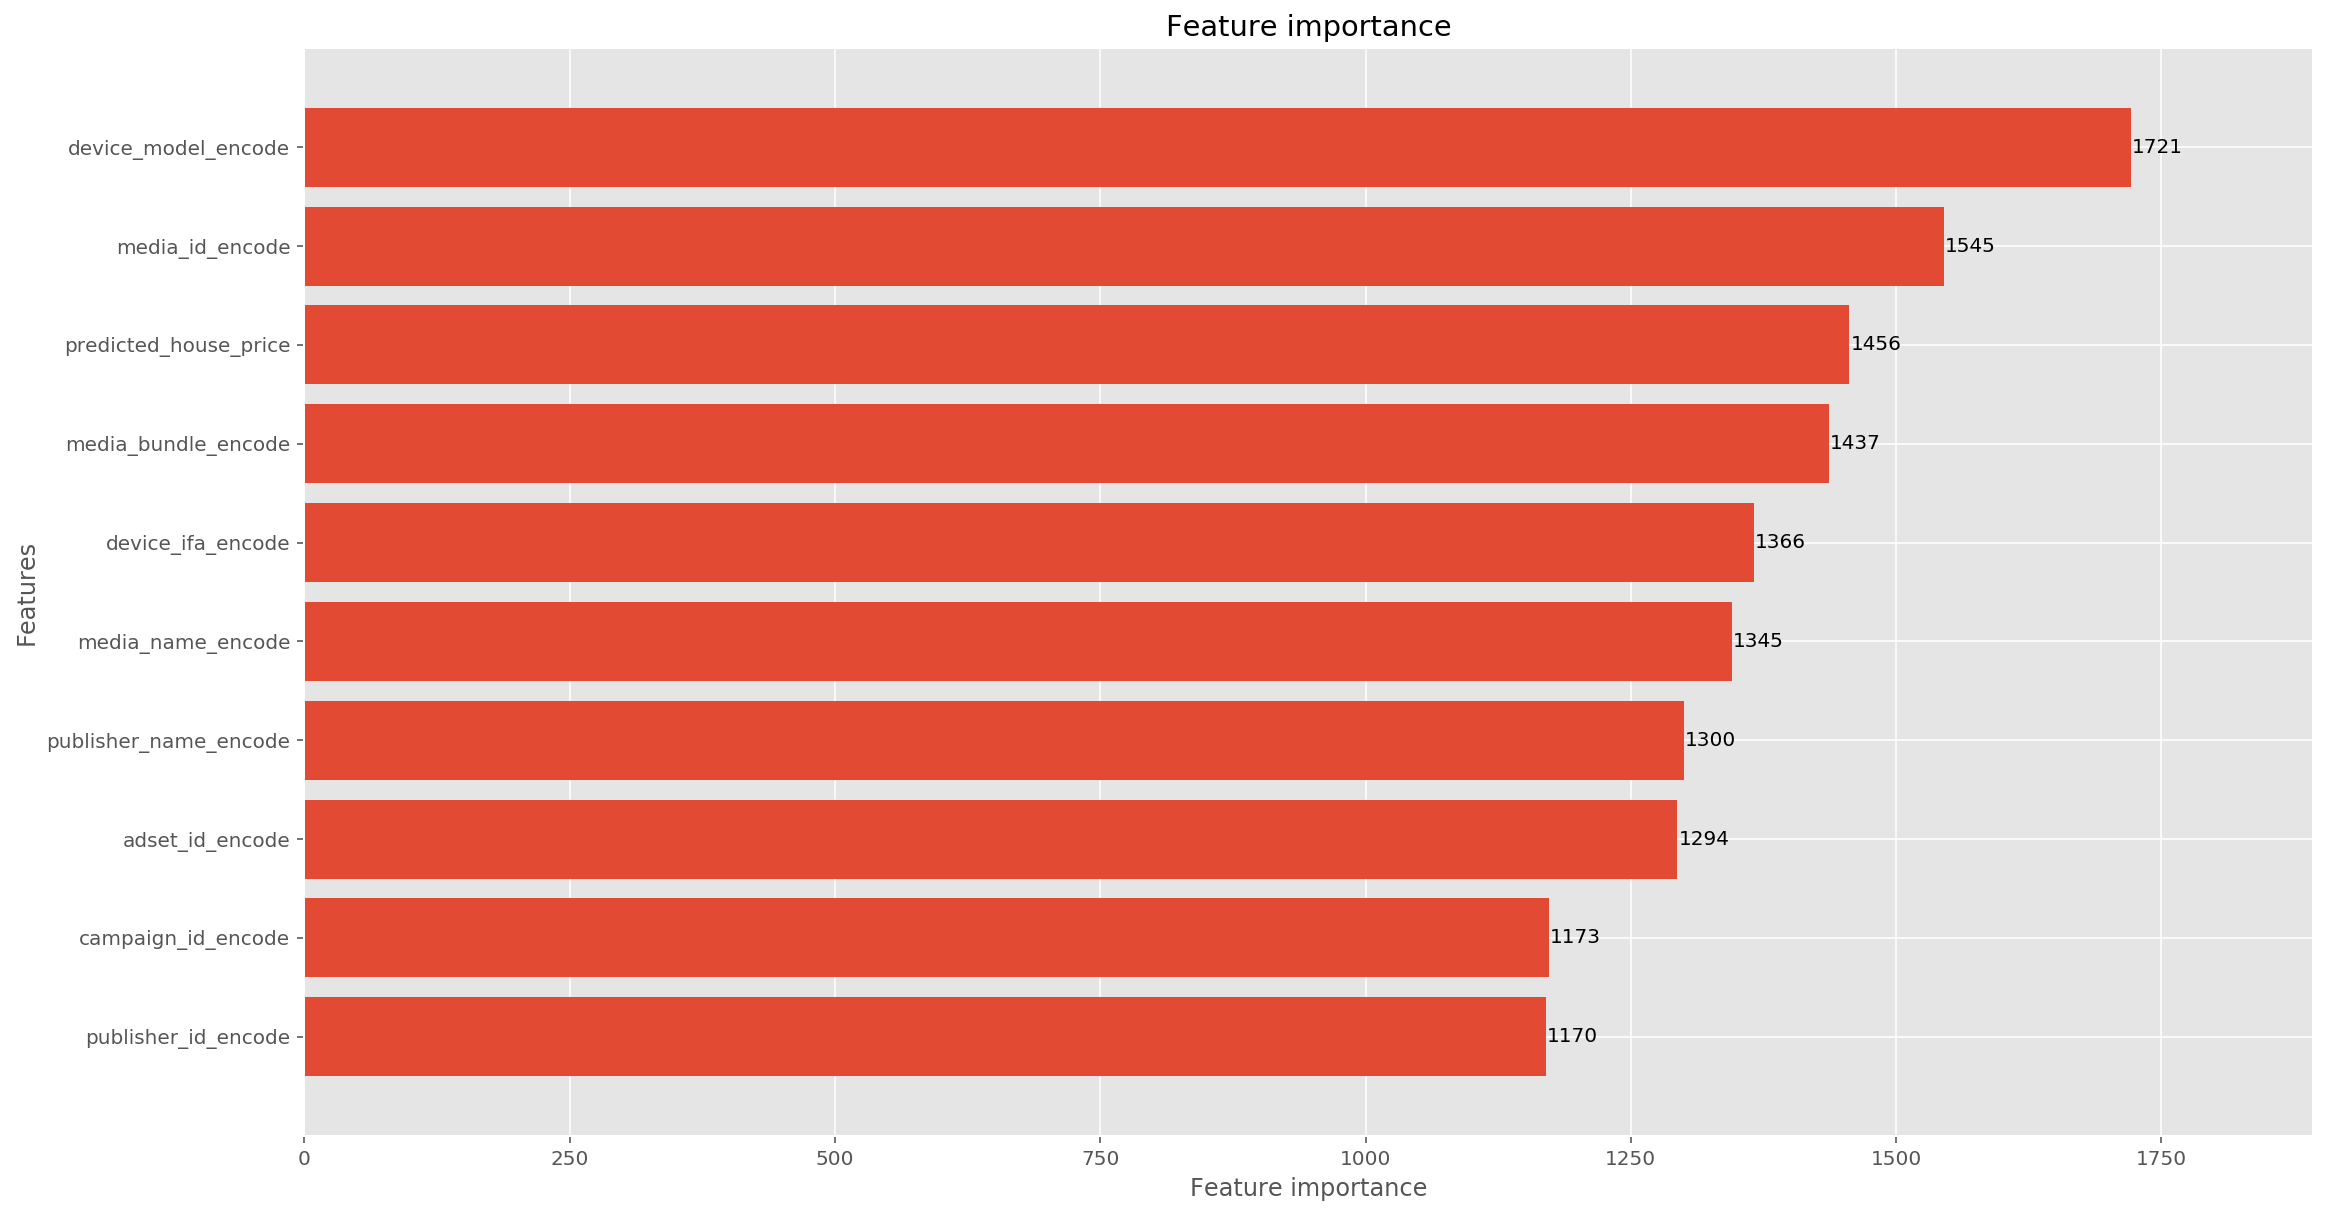

In [12]:
lightgbm.plot_importance(model1, max_num_features  = 10, ignore_zero=True, figsize = (18, 10), height=0.8)

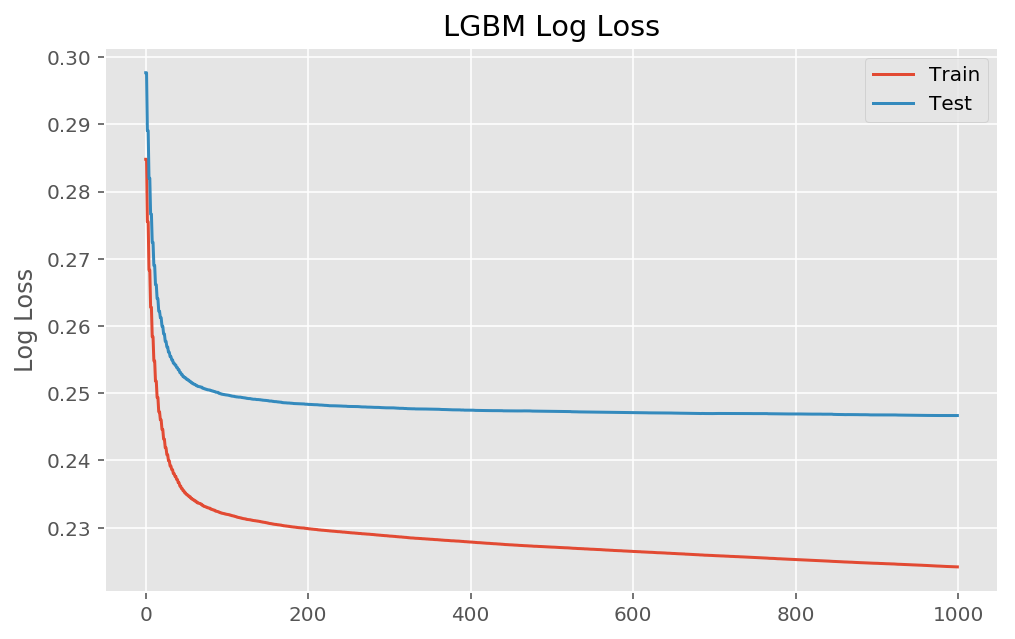

In [13]:
# retrieve performance metrics
results = model1.evals_result_
epochs = len(results['training']['binary_logloss'])
x_axis = range(0, epochs)
# plot log loss
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x_axis, results['training']['binary_logloss'], label='Train')
ax.plot(x_axis, results['valid_1']['binary_logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('LGBM Log Loss')
plt.show()

### model2 : SelectFromModel feature selection 진행 -> 성능 더 안좋아짐

In [14]:
from sklearn.feature_selection import SelectFromModel

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction':  0.2319,
    'bagging_fraction': 0.8,
    'bagging_freq': 20,
    'verbose': 0,
    'max_bin': 500,
    'num_iterations': 500,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10,
    'random_state': 42
}

lgbc= lightgbm.LGBMClassifier(**params)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=len(X_train.columns))
embeded_lgb_selector.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


SelectFromModel(estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=20,
                                         boosting_type='gbdt',
                                         class_weight=None,
                                         colsample_bytree=1.0,
                                         feature_fraction=0.2319,
                                         importance_type='split',
                                         learning_rate=0.1, max_bin=500,
                                         max_depth=-1, min_child_samples=20,
                                         min_child_weight=0.001,
                                         min_data_in_leaf=10,
                                         min_split_gain=0.0,
                                         min_sum_hessian_in_leaf=10,
                                         n_estimators=100, n_jobs=-1,
                                         num_iterations=500, num_leaves=50,
                                         objectiv

In [15]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_train.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

19 selected features


In [16]:
embeded_lgb_feature

['age',
 'predicted_house_price',
 'hour',
 'campaign_id_encode',
 'adset_id_encode',
 'media_id_encode',
 'media_name_encode',
 'media_bundle_encode',
 'publisher_id_encode',
 'publisher_name_encode',
 'device_ifa_encode',
 'device_os_version_encode',
 'device_model_encode',
 'device_carrier_encode',
 'device_region_encode',
 'device_city_encode',
 'advertisement_id_encode',
 'install_pack_encode',
 'cate_code_encode']

In [17]:
X_train = X_train[embeded_lgb_feature]
X_test = X_test[embeded_lgb_feature]

In [18]:
import lightgbm

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction':  0.2319,
    'bagging_fraction': 0.8,
    'bagging_freq': 20,
    'verbose': 0,
    'max_bin': 500,
    'num_iterations': 500,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10,
    'random_state': 42
}

model2= lightgbm.LGBMClassifier(**params)

eval_set = [(X_train, y_train), (X_test, y_test)]
model2.fit(X_train, y_train, eval_metric="logloss", eval_set=eval_set, verbose=True)

[1]	training's binary_logloss: 0.28539	training's binary_logloss: 0.28539	valid_1's binary_logloss: 0.298391	valid_1's binary_logloss: 0.298391
[2]	training's binary_logloss: 0.275887	training's binary_logloss: 0.275887	valid_1's binary_logloss: 0.288977	valid_1's binary_logloss: 0.288977
[3]	training's binary_logloss: 0.268764	training's binary_logloss: 0.268764	valid_1's binary_logloss: 0.282006	valid_1's binary_logloss: 0.282006
[4]	training's binary_logloss: 0.264542	training's binary_logloss: 0.264542	valid_1's binary_logloss: 0.277895	valid_1's binary_logloss: 0.277895
[5]	training's binary_logloss: 0.26125	training's binary_logloss: 0.26125	valid_1's binary_logloss: 0.274705	valid_1's binary_logloss: 0.274705
[6]	training's binary_logloss: 0.258863	training's binary_logloss: 0.258863	valid_1's binary_logloss: 0.272878	valid_1's binary_logloss: 0.272878
[7]	training's binary_logloss: 0.255808	training's binary_logloss: 0.255808	valid_1's binary_logloss: 0.270169	valid_1's binary_

[57]	training's binary_logloss: 0.232686	training's binary_logloss: 0.232686	valid_1's binary_logloss: 0.250639	valid_1's binary_logloss: 0.250639
[58]	training's binary_logloss: 0.232648	training's binary_logloss: 0.232648	valid_1's binary_logloss: 0.250618	valid_1's binary_logloss: 0.250618
[59]	training's binary_logloss: 0.232598	training's binary_logloss: 0.232598	valid_1's binary_logloss: 0.250584	valid_1's binary_logloss: 0.250584
[60]	training's binary_logloss: 0.232565	training's binary_logloss: 0.232565	valid_1's binary_logloss: 0.250562	valid_1's binary_logloss: 0.250562
[61]	training's binary_logloss: 0.232504	training's binary_logloss: 0.232504	valid_1's binary_logloss: 0.250511	valid_1's binary_logloss: 0.250511
[62]	training's binary_logloss: 0.232446	training's binary_logloss: 0.232446	valid_1's binary_logloss: 0.250466	valid_1's binary_logloss: 0.250466
[63]	training's binary_logloss: 0.232405	training's binary_logloss: 0.232405	valid_1's binary_logloss: 0.250444	valid_

[113]	training's binary_logloss: 0.230536	training's binary_logloss: 0.230536	valid_1's binary_logloss: 0.249175	valid_1's binary_logloss: 0.249175
[114]	training's binary_logloss: 0.230514	training's binary_logloss: 0.230514	valid_1's binary_logloss: 0.24917	valid_1's binary_logloss: 0.24917
[115]	training's binary_logloss: 0.230496	training's binary_logloss: 0.230496	valid_1's binary_logloss: 0.249161	valid_1's binary_logloss: 0.249161
[116]	training's binary_logloss: 0.230472	training's binary_logloss: 0.230472	valid_1's binary_logloss: 0.249139	valid_1's binary_logloss: 0.249139
[117]	training's binary_logloss: 0.230448	training's binary_logloss: 0.230448	valid_1's binary_logloss: 0.249126	valid_1's binary_logloss: 0.249126
[118]	training's binary_logloss: 0.230432	training's binary_logloss: 0.230432	valid_1's binary_logloss: 0.249126	valid_1's binary_logloss: 0.249126
[119]	training's binary_logloss: 0.230399	training's binary_logloss: 0.230399	valid_1's binary_logloss: 0.249097	v

[170]	training's binary_logloss: 0.229446	training's binary_logloss: 0.229446	valid_1's binary_logloss: 0.248671	valid_1's binary_logloss: 0.248671
[171]	training's binary_logloss: 0.229419	training's binary_logloss: 0.229419	valid_1's binary_logloss: 0.248651	valid_1's binary_logloss: 0.248651
[172]	training's binary_logloss: 0.229402	training's binary_logloss: 0.229402	valid_1's binary_logloss: 0.248644	valid_1's binary_logloss: 0.248644
[173]	training's binary_logloss: 0.229384	training's binary_logloss: 0.229384	valid_1's binary_logloss: 0.248633	valid_1's binary_logloss: 0.248633
[174]	training's binary_logloss: 0.229369	training's binary_logloss: 0.229369	valid_1's binary_logloss: 0.248628	valid_1's binary_logloss: 0.248628
[175]	training's binary_logloss: 0.229357	training's binary_logloss: 0.229357	valid_1's binary_logloss: 0.248621	valid_1's binary_logloss: 0.248621
[176]	training's binary_logloss: 0.229346	training's binary_logloss: 0.229346	valid_1's binary_logloss: 0.248619

[226]	training's binary_logloss: 0.228505	training's binary_logloss: 0.228505	valid_1's binary_logloss: 0.248311	valid_1's binary_logloss: 0.248311
[227]	training's binary_logloss: 0.228486	training's binary_logloss: 0.228486	valid_1's binary_logloss: 0.248317	valid_1's binary_logloss: 0.248317
[228]	training's binary_logloss: 0.228464	training's binary_logloss: 0.228464	valid_1's binary_logloss: 0.248301	valid_1's binary_logloss: 0.248301
[229]	training's binary_logloss: 0.228441	training's binary_logloss: 0.228441	valid_1's binary_logloss: 0.248297	valid_1's binary_logloss: 0.248297
[230]	training's binary_logloss: 0.228432	training's binary_logloss: 0.228432	valid_1's binary_logloss: 0.248287	valid_1's binary_logloss: 0.248287
[231]	training's binary_logloss: 0.228417	training's binary_logloss: 0.228417	valid_1's binary_logloss: 0.248277	valid_1's binary_logloss: 0.248277
[232]	training's binary_logloss: 0.228406	training's binary_logloss: 0.228406	valid_1's binary_logloss: 0.248276

[283]	training's binary_logloss: 0.227763	training's binary_logloss: 0.227763	valid_1's binary_logloss: 0.248108	valid_1's binary_logloss: 0.248108
[284]	training's binary_logloss: 0.227748	training's binary_logloss: 0.227748	valid_1's binary_logloss: 0.248091	valid_1's binary_logloss: 0.248091
[285]	training's binary_logloss: 0.22773	training's binary_logloss: 0.22773	valid_1's binary_logloss: 0.248086	valid_1's binary_logloss: 0.248086
[286]	training's binary_logloss: 0.227712	training's binary_logloss: 0.227712	valid_1's binary_logloss: 0.248076	valid_1's binary_logloss: 0.248076
[287]	training's binary_logloss: 0.227688	training's binary_logloss: 0.227688	valid_1's binary_logloss: 0.248066	valid_1's binary_logloss: 0.248066
[288]	training's binary_logloss: 0.227676	training's binary_logloss: 0.227676	valid_1's binary_logloss: 0.248061	valid_1's binary_logloss: 0.248061
[289]	training's binary_logloss: 0.227658	training's binary_logloss: 0.227658	valid_1's binary_logloss: 0.248043	v

[340]	training's binary_logloss: 0.22701	training's binary_logloss: 0.22701	valid_1's binary_logloss: 0.247843	valid_1's binary_logloss: 0.247843
[341]	training's binary_logloss: 0.226993	training's binary_logloss: 0.226993	valid_1's binary_logloss: 0.247841	valid_1's binary_logloss: 0.247841
[342]	training's binary_logloss: 0.226983	training's binary_logloss: 0.226983	valid_1's binary_logloss: 0.247835	valid_1's binary_logloss: 0.247835
[343]	training's binary_logloss: 0.226971	training's binary_logloss: 0.226971	valid_1's binary_logloss: 0.247833	valid_1's binary_logloss: 0.247833
[344]	training's binary_logloss: 0.226959	training's binary_logloss: 0.226959	valid_1's binary_logloss: 0.247825	valid_1's binary_logloss: 0.247825
[345]	training's binary_logloss: 0.226949	training's binary_logloss: 0.226949	valid_1's binary_logloss: 0.247826	valid_1's binary_logloss: 0.247826
[346]	training's binary_logloss: 0.226942	training's binary_logloss: 0.226942	valid_1's binary_logloss: 0.247827	v

[396]	training's binary_logloss: 0.226382	training's binary_logloss: 0.226382	valid_1's binary_logloss: 0.24771	valid_1's binary_logloss: 0.24771
[397]	training's binary_logloss: 0.226366	training's binary_logloss: 0.226366	valid_1's binary_logloss: 0.247712	valid_1's binary_logloss: 0.247712
[398]	training's binary_logloss: 0.226359	training's binary_logloss: 0.226359	valid_1's binary_logloss: 0.247711	valid_1's binary_logloss: 0.247711
[399]	training's binary_logloss: 0.226348	training's binary_logloss: 0.226348	valid_1's binary_logloss: 0.247705	valid_1's binary_logloss: 0.247705
[400]	training's binary_logloss: 0.226339	training's binary_logloss: 0.226339	valid_1's binary_logloss: 0.247705	valid_1's binary_logloss: 0.247705
[401]	training's binary_logloss: 0.226328	training's binary_logloss: 0.226328	valid_1's binary_logloss: 0.247713	valid_1's binary_logloss: 0.247713
[402]	training's binary_logloss: 0.226317	training's binary_logloss: 0.226317	valid_1's binary_logloss: 0.247711	v

[453]	training's binary_logloss: 0.225791	training's binary_logloss: 0.225791	valid_1's binary_logloss: 0.247665	valid_1's binary_logloss: 0.247665
[454]	training's binary_logloss: 0.225782	training's binary_logloss: 0.225782	valid_1's binary_logloss: 0.247677	valid_1's binary_logloss: 0.247677
[455]	training's binary_logloss: 0.225771	training's binary_logloss: 0.225771	valid_1's binary_logloss: 0.247677	valid_1's binary_logloss: 0.247677
[456]	training's binary_logloss: 0.225763	training's binary_logloss: 0.225763	valid_1's binary_logloss: 0.247677	valid_1's binary_logloss: 0.247677
[457]	training's binary_logloss: 0.225754	training's binary_logloss: 0.225754	valid_1's binary_logloss: 0.247673	valid_1's binary_logloss: 0.247673
[458]	training's binary_logloss: 0.225741	training's binary_logloss: 0.225741	valid_1's binary_logloss: 0.247671	valid_1's binary_logloss: 0.247671
[459]	training's binary_logloss: 0.225732	training's binary_logloss: 0.225732	valid_1's binary_logloss: 0.247671

LGBMClassifier(bagging_fraction=0.8, bagging_freq=20, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.2319,
               importance_type='split', learning_rate=0.1, max_bin=500,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=10, min_split_gain=0.0,
               min_sum_hessian_in_leaf=10, n_estimators=100, n_jobs=-1,
               num_iterations=500, num_leaves=50, objective='binary',
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               verbose=0)

In [19]:
lg_loan_status_probas = model2.predict_proba(X_test)
lg_log_loss = log_loss(y_test, lg_loan_status_probas)
print(lg_log_loss)

0.24759961534085712


### model3 : model1에서 SMOTE를 통한 데이터 불균형 해결 (over sampling)

In [20]:
train = df[df['day'].isin(list(range(1,10)))]
test = df[df['day'] == 10]

#### - train 데이터에서 클릭 / 비클릭 비율 확인 -> class가 매우 편향적

In [21]:
train[train['click'] == 1].shape

(174207, 42)

In [22]:
train[train['click'] == 0].shape

(1803920, 42)

In [23]:
# 클릭 비율
174207 / (174207 + 1803920)*100 

8.806664081729839

In [24]:
# 비클릭 비율
1803920 / (174207 + 1803920)*100 

91.19333591827015

#### - SMOTE를 통한 데이터 불균형 해결 (over sampling)

In [25]:
train.index=range(0, len(train))

In [26]:
train.head()

,click,event_datetime,bid_id,age,marry,predicted_house_price,day,hour,holiday,placement_type_WnrXFsYXNs,...,device_os_version_encode,device_model_encode,device_carrier_encode,device_make_encode,device_language_encode,device_region_encode,device_city_encode,advertisement_id_encode,install_pack_encode,cate_code_encode
0,0,2019-10-01 00:00:05.289,aAEDD9AeIv,8,0,10000.0,1,0,0,0,...,0.300569,0.302844,0.396518,0.529674,0.346448,0.635845,0.626661,0.044477,0.000002,0.000002
1,0,2019-10-02 01:50:55.776,120KZBpPEp,8,0,10000.0,2,1,0,0,...,0.300569,0.302844,0.396518,0.529674,0.346448,0.635845,0.626661,0.044477,0.000002,0.000002
2,0,2019-10-03 07:30:56.756,AMFiNF3X7r,8,0,10000.0,3,7,1,0,...,0.300569,0.302844,0.396518,0.529674,0.346448,0.635845,0.626661,0.044477,0.000002,0.000002
3,0,2019-10-07 00:15:31.816,Mza3hx3DOX,8,0,10000.0,7,0,0,0,...,0.084223,0.094481,0.212653,0.413243,0.651317,0.006898,0.005312,0.031688,0.000002,0.000002
4,0,2019-10-09 15:01:40.412,4GbWwwNnJZ,8,0,10000.0,9,15,1,0,...,0.300569,0.302844,0.396518,0.529674,0.346448,0.635845,0.626661,0.044477,0.000002,0.000002


In [27]:
X_train = np.array(train.ix[:, 3:])
y_train = np.array(train.ix[:, 0])
print('Shape of X_train: {}'.format(X_train.shape))
print('Shape of y_train: {}'.format(y_train.shape))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


Shape of X_train: (1978127, 39)
Shape of y_train: (1978127,)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [28]:
X_test = np.array(test.ix[:, 3:])
y_test = np.array(test.ix[:, 0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [29]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1978127, 39)
Number transactions y_train dataset:  (1978127,)
Number transactions X_test dataset:  (254243, 39)
Number transactions y_test dataset:  (254243,)


In [30]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=42, ratio='auto', kind='regular')
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Using TensorFlow backend.


Before OverSampling, counts of label '1': 174207
Before OverSampling, counts of label '0': 1803920 

After OverSampling, the shape of train_X: (3607840, 39)
After OverSampling, the shape of train_y: (3607840,) 

After OverSampling, counts of label '1': 1803920
After OverSampling, counts of label '0': 1803920


In [31]:
X_train_res = pd.DataFrame(X_train_res, columns=train.iloc[:, 3:].columns)
X_test = pd.DataFrame(X_test, columns= train.iloc[:, 3:].columns)

In [32]:
import lightgbm

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction':  0.2319,
    'bagging_fraction': 0.8,
    'bagging_freq': 20,
    'verbose': 0,
    'max_bin': 500,
    'num_iterations': 500,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10,
    'random_state': 42
}

model3= lightgbm.LGBMClassifier(**params)

eval_set = [(X_train_res, y_train_res), (X_test, y_test)]
model3.fit(X_train_res, y_train_res, eval_metric="logloss", eval_set=eval_set, verbose=True)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.630445	training's binary_logloss: 0.630445	valid_1's binary_logloss: 0.641711	valid_1's binary_logloss: 0.641711
[2]	training's binary_logloss: 0.577674	training's binary_logloss: 0.577674	valid_1's binary_logloss: 0.599441	valid_1's binary_logloss: 0.599441
[3]	training's binary_logloss: 0.533972	training's binary_logloss: 0.533972	valid_1's binary_logloss: 0.563178	valid_1's binary_logloss: 0.563178
[4]	training's binary_logloss: 0.497064	training's binary_logloss: 0.497064	valid_1's binary_logloss: 0.533099	valid_1's binary_logloss: 0.533099
[5]	training's binary_logloss: 0.465445	training's binary_logloss: 0.465445	valid_1's binary_logloss: 0.506853	valid_1's binary_logloss: 0.506853
[6]	training's binary_logloss: 0.437313	training's binary_logloss: 0.437313	valid_1's binary_logloss: 0.484798	valid_1's binary_logloss: 0.484798
[7]	training's binary_logloss: 0.410613	training's binary_logloss: 0.410613	valid_1's binary_logloss: 0.463112	valid_1's bin

[57]	training's binary_logloss: 0.160147	training's binary_logloss: 0.160147	valid_1's binary_logloss: 0.267627	valid_1's binary_logloss: 0.267627
[58]	training's binary_logloss: 0.159416	training's binary_logloss: 0.159416	valid_1's binary_logloss: 0.267151	valid_1's binary_logloss: 0.267151
[59]	training's binary_logloss: 0.158839	training's binary_logloss: 0.158839	valid_1's binary_logloss: 0.266968	valid_1's binary_logloss: 0.266968
[60]	training's binary_logloss: 0.158368	training's binary_logloss: 0.158368	valid_1's binary_logloss: 0.266626	valid_1's binary_logloss: 0.266626
[61]	training's binary_logloss: 0.157871	training's binary_logloss: 0.157871	valid_1's binary_logloss: 0.266328	valid_1's binary_logloss: 0.266328
[62]	training's binary_logloss: 0.157362	training's binary_logloss: 0.157362	valid_1's binary_logloss: 0.265897	valid_1's binary_logloss: 0.265897
[63]	training's binary_logloss: 0.156897	training's binary_logloss: 0.156897	valid_1's binary_logloss: 0.265474	valid_

[113]	training's binary_logloss: 0.14119	training's binary_logloss: 0.14119	valid_1's binary_logloss: 0.256115	valid_1's binary_logloss: 0.256115
[114]	training's binary_logloss: 0.141028	training's binary_logloss: 0.141028	valid_1's binary_logloss: 0.255994	valid_1's binary_logloss: 0.255994
[115]	training's binary_logloss: 0.140953	training's binary_logloss: 0.140953	valid_1's binary_logloss: 0.255946	valid_1's binary_logloss: 0.255946
[116]	training's binary_logloss: 0.140878	training's binary_logloss: 0.140878	valid_1's binary_logloss: 0.255875	valid_1's binary_logloss: 0.255875
[117]	training's binary_logloss: 0.140786	training's binary_logloss: 0.140786	valid_1's binary_logloss: 0.255829	valid_1's binary_logloss: 0.255829
[118]	training's binary_logloss: 0.140713	training's binary_logloss: 0.140713	valid_1's binary_logloss: 0.255792	valid_1's binary_logloss: 0.255792
[119]	training's binary_logloss: 0.140627	training's binary_logloss: 0.140627	valid_1's binary_logloss: 0.255707	v

[169]	training's binary_logloss: 0.137225	training's binary_logloss: 0.137225	valid_1's binary_logloss: 0.253477	valid_1's binary_logloss: 0.253477
[170]	training's binary_logloss: 0.137165	training's binary_logloss: 0.137165	valid_1's binary_logloss: 0.253451	valid_1's binary_logloss: 0.253451
[171]	training's binary_logloss: 0.137126	training's binary_logloss: 0.137126	valid_1's binary_logloss: 0.253414	valid_1's binary_logloss: 0.253414
[172]	training's binary_logloss: 0.137074	training's binary_logloss: 0.137074	valid_1's binary_logloss: 0.253394	valid_1's binary_logloss: 0.253394
[173]	training's binary_logloss: 0.137041	training's binary_logloss: 0.137041	valid_1's binary_logloss: 0.253374	valid_1's binary_logloss: 0.253374
[174]	training's binary_logloss: 0.137007	training's binary_logloss: 0.137007	valid_1's binary_logloss: 0.253333	valid_1's binary_logloss: 0.253333
[175]	training's binary_logloss: 0.136973	training's binary_logloss: 0.136973	valid_1's binary_logloss: 0.253313

[225]	training's binary_logloss: 0.135284	training's binary_logloss: 0.135284	valid_1's binary_logloss: 0.252251	valid_1's binary_logloss: 0.252251
[226]	training's binary_logloss: 0.135253	training's binary_logloss: 0.135253	valid_1's binary_logloss: 0.252241	valid_1's binary_logloss: 0.252241
[227]	training's binary_logloss: 0.13523	training's binary_logloss: 0.13523	valid_1's binary_logloss: 0.252277	valid_1's binary_logloss: 0.252277
[228]	training's binary_logloss: 0.135206	training's binary_logloss: 0.135206	valid_1's binary_logloss: 0.252266	valid_1's binary_logloss: 0.252266
[229]	training's binary_logloss: 0.135181	training's binary_logloss: 0.135181	valid_1's binary_logloss: 0.252252	valid_1's binary_logloss: 0.252252
[230]	training's binary_logloss: 0.135159	training's binary_logloss: 0.135159	valid_1's binary_logloss: 0.252249	valid_1's binary_logloss: 0.252249
[231]	training's binary_logloss: 0.135131	training's binary_logloss: 0.135131	valid_1's binary_logloss: 0.252238	v

[281]	training's binary_logloss: 0.134072	training's binary_logloss: 0.134072	valid_1's binary_logloss: 0.251734	valid_1's binary_logloss: 0.251734
[282]	training's binary_logloss: 0.134057	training's binary_logloss: 0.134057	valid_1's binary_logloss: 0.251698	valid_1's binary_logloss: 0.251698
[283]	training's binary_logloss: 0.134035	training's binary_logloss: 0.134035	valid_1's binary_logloss: 0.251679	valid_1's binary_logloss: 0.251679
[284]	training's binary_logloss: 0.134019	training's binary_logloss: 0.134019	valid_1's binary_logloss: 0.251672	valid_1's binary_logloss: 0.251672
[285]	training's binary_logloss: 0.133999	training's binary_logloss: 0.133999	valid_1's binary_logloss: 0.251645	valid_1's binary_logloss: 0.251645
[286]	training's binary_logloss: 0.133981	training's binary_logloss: 0.133981	valid_1's binary_logloss: 0.251636	valid_1's binary_logloss: 0.251636
[287]	training's binary_logloss: 0.133961	training's binary_logloss: 0.133961	valid_1's binary_logloss: 0.251626

[337]	training's binary_logloss: 0.133116	training's binary_logloss: 0.133116	valid_1's binary_logloss: 0.251274	valid_1's binary_logloss: 0.251274
[338]	training's binary_logloss: 0.133103	training's binary_logloss: 0.133103	valid_1's binary_logloss: 0.251269	valid_1's binary_logloss: 0.251269
[339]	training's binary_logloss: 0.133083	training's binary_logloss: 0.133083	valid_1's binary_logloss: 0.251239	valid_1's binary_logloss: 0.251239
[340]	training's binary_logloss: 0.133061	training's binary_logloss: 0.133061	valid_1's binary_logloss: 0.251226	valid_1's binary_logloss: 0.251226
[341]	training's binary_logloss: 0.133036	training's binary_logloss: 0.133036	valid_1's binary_logloss: 0.251213	valid_1's binary_logloss: 0.251213
[342]	training's binary_logloss: 0.133025	training's binary_logloss: 0.133025	valid_1's binary_logloss: 0.251192	valid_1's binary_logloss: 0.251192
[343]	training's binary_logloss: 0.133005	training's binary_logloss: 0.133005	valid_1's binary_logloss: 0.251185

[393]	training's binary_logloss: 0.132218	training's binary_logloss: 0.132218	valid_1's binary_logloss: 0.25073	valid_1's binary_logloss: 0.25073
[394]	training's binary_logloss: 0.132212	training's binary_logloss: 0.132212	valid_1's binary_logloss: 0.250731	valid_1's binary_logloss: 0.250731
[395]	training's binary_logloss: 0.132199	training's binary_logloss: 0.132199	valid_1's binary_logloss: 0.250724	valid_1's binary_logloss: 0.250724
[396]	training's binary_logloss: 0.132189	training's binary_logloss: 0.132189	valid_1's binary_logloss: 0.250677	valid_1's binary_logloss: 0.250677
[397]	training's binary_logloss: 0.132181	training's binary_logloss: 0.132181	valid_1's binary_logloss: 0.250677	valid_1's binary_logloss: 0.250677
[398]	training's binary_logloss: 0.132169	training's binary_logloss: 0.132169	valid_1's binary_logloss: 0.250668	valid_1's binary_logloss: 0.250668
[399]	training's binary_logloss: 0.132154	training's binary_logloss: 0.132154	valid_1's binary_logloss: 0.250659	v

[450]	training's binary_logloss: 0.131428	training's binary_logloss: 0.131428	valid_1's binary_logloss: 0.250442	valid_1's binary_logloss: 0.250442
[451]	training's binary_logloss: 0.13142	training's binary_logloss: 0.13142	valid_1's binary_logloss: 0.250445	valid_1's binary_logloss: 0.250445
[452]	training's binary_logloss: 0.131409	training's binary_logloss: 0.131409	valid_1's binary_logloss: 0.250445	valid_1's binary_logloss: 0.250445
[453]	training's binary_logloss: 0.131403	training's binary_logloss: 0.131403	valid_1's binary_logloss: 0.250442	valid_1's binary_logloss: 0.250442
[454]	training's binary_logloss: 0.131394	training's binary_logloss: 0.131394	valid_1's binary_logloss: 0.25044	valid_1's binary_logloss: 0.25044
[455]	training's binary_logloss: 0.131383	training's binary_logloss: 0.131383	valid_1's binary_logloss: 0.250446	valid_1's binary_logloss: 0.250446
[456]	training's binary_logloss: 0.131373	training's binary_logloss: 0.131373	valid_1's binary_logloss: 0.250435	val

LGBMClassifier(bagging_fraction=0.8, bagging_freq=20, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.2319,
               importance_type='split', learning_rate=0.1, max_bin=500,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=10, min_split_gain=0.0,
               min_sum_hessian_in_leaf=10, n_estimators=100, n_jobs=-1,
               num_iterations=500, num_leaves=50, objective='binary',
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               verbose=0)

In [33]:
lg_loan_status_probas = model3.predict_proba(X_test)
lg_log_loss = log_loss(y_test, lg_loan_status_probas)
print(lg_log_loss)

0.250239188498275


### model4 : model1에서 SMOTE를 통한 데이터 불균형 해결 (over sampling) -> ratio 조절

In [34]:
X_train = np.array(train.ix[:, 3:])
y_train = np.array(train.ix[:, 0])

X_test = np.array(test.ix[:, 3:])
y_test = np.array(test.ix[:, 0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-ind

In [35]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=42, ratio=0.3, kind='regular')
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 174207
Before OverSampling, counts of label '0': 1803920 

After OverSampling, the shape of train_X: (2345096, 39)
After OverSampling, the shape of train_y: (2345096,) 

After OverSampling, counts of label '1': 541176
After OverSampling, counts of label '0': 1803920


In [36]:
X_train_res = pd.DataFrame(X_train_res, columns=train.iloc[:, 3:].columns)
X_test = pd.DataFrame(X_test, columns= train.iloc[:, 3:].columns)

In [37]:
import lightgbm

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction':  0.2319,
    'bagging_fraction': 0.8,
    'bagging_freq': 20,
    'verbose': 0,
    'max_bin': 500,
    'num_iterations': 500,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10,
    'random_state': 42
}

model4= lightgbm.LGBMClassifier(**params)

eval_set = [(X_train_res, y_train_res), (X_test, y_test)]
model4.fit(X_train_res, y_train_res, eval_metric="logloss", eval_set=eval_set, verbose=True)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.487903	training's binary_logloss: 0.487903	valid_1's binary_logloss: 0.36112	valid_1's binary_logloss: 0.36112
[2]	training's binary_logloss: 0.450843	training's binary_logloss: 0.450843	valid_1's binary_logloss: 0.348989	valid_1's binary_logloss: 0.348989
[3]	training's binary_logloss: 0.421306	training's binary_logloss: 0.421306	valid_1's binary_logloss: 0.338499	valid_1's binary_logloss: 0.338499
[4]	training's binary_logloss: 0.397984	training's binary_logloss: 0.397984	valid_1's binary_logloss: 0.329957	valid_1's binary_logloss: 0.329957
[5]	training's binary_logloss: 0.378044	training's binary_logloss: 0.378044	valid_1's binary_logloss: 0.322265	valid_1's binary_logloss: 0.322265
[6]	training's binary_logloss: 0.36144	training's binary_logloss: 0.36144	valid_1's binary_logloss: 0.315673	valid_1's binary_logloss: 0.315673
[7]	training's binary_logloss: 0.346031	training's binary_logloss: 0.346031	valid_1's binary_logloss: 0.30945	valid_1's binary_l

[57]	training's binary_logloss: 0.213412	training's binary_logloss: 0.213412	valid_1's binary_logloss: 0.255011	valid_1's binary_logloss: 0.255011
[58]	training's binary_logloss: 0.212971	training's binary_logloss: 0.212971	valid_1's binary_logloss: 0.254899	valid_1's binary_logloss: 0.254899
[59]	training's binary_logloss: 0.212634	training's binary_logloss: 0.212634	valid_1's binary_logloss: 0.254876	valid_1's binary_logloss: 0.254876
[60]	training's binary_logloss: 0.212361	training's binary_logloss: 0.212361	valid_1's binary_logloss: 0.254751	valid_1's binary_logloss: 0.254751
[61]	training's binary_logloss: 0.212059	training's binary_logloss: 0.212059	valid_1's binary_logloss: 0.254648	valid_1's binary_logloss: 0.254648
[62]	training's binary_logloss: 0.211692	training's binary_logloss: 0.211692	valid_1's binary_logloss: 0.254445	valid_1's binary_logloss: 0.254445
[63]	training's binary_logloss: 0.211361	training's binary_logloss: 0.211361	valid_1's binary_logloss: 0.254239	valid_

[113]	training's binary_logloss: 0.202715	training's binary_logloss: 0.202715	valid_1's binary_logloss: 0.250976	valid_1's binary_logloss: 0.250976
[114]	training's binary_logloss: 0.202523	training's binary_logloss: 0.202523	valid_1's binary_logloss: 0.250933	valid_1's binary_logloss: 0.250933
[115]	training's binary_logloss: 0.20246	training's binary_logloss: 0.20246	valid_1's binary_logloss: 0.254216	valid_1's binary_logloss: 0.254216
[116]	training's binary_logloss: 0.202409	training's binary_logloss: 0.202409	valid_1's binary_logloss: 0.254196	valid_1's binary_logloss: 0.254196
[117]	training's binary_logloss: 0.202322	training's binary_logloss: 0.202322	valid_1's binary_logloss: 0.254176	valid_1's binary_logloss: 0.254176
[118]	training's binary_logloss: 0.202255	training's binary_logloss: 0.202255	valid_1's binary_logloss: 0.254152	valid_1's binary_logloss: 0.254152
[119]	training's binary_logloss: 0.202205	training's binary_logloss: 0.202205	valid_1's binary_logloss: 0.254103	v

[169]	training's binary_logloss: 0.199563	training's binary_logloss: 0.199563	valid_1's binary_logloss: 0.252702	valid_1's binary_logloss: 0.252702
[170]	training's binary_logloss: 0.199526	training's binary_logloss: 0.199526	valid_1's binary_logloss: 0.252683	valid_1's binary_logloss: 0.252683
[171]	training's binary_logloss: 0.199497	training's binary_logloss: 0.199497	valid_1's binary_logloss: 0.252669	valid_1's binary_logloss: 0.252669
[172]	training's binary_logloss: 0.199473	training's binary_logloss: 0.199473	valid_1's binary_logloss: 0.252656	valid_1's binary_logloss: 0.252656
[173]	training's binary_logloss: 0.199433	training's binary_logloss: 0.199433	valid_1's binary_logloss: 0.252638	valid_1's binary_logloss: 0.252638
[174]	training's binary_logloss: 0.19939	training's binary_logloss: 0.19939	valid_1's binary_logloss: 0.252554	valid_1's binary_logloss: 0.252554
[175]	training's binary_logloss: 0.199356	training's binary_logloss: 0.199356	valid_1's binary_logloss: 0.252541	v

[225]	training's binary_logloss: 0.197807	training's binary_logloss: 0.197807	valid_1's binary_logloss: 0.251905	valid_1's binary_logloss: 0.251905
[226]	training's binary_logloss: 0.19778	training's binary_logloss: 0.19778	valid_1's binary_logloss: 0.251896	valid_1's binary_logloss: 0.251896
[227]	training's binary_logloss: 0.197762	training's binary_logloss: 0.197762	valid_1's binary_logloss: 0.251888	valid_1's binary_logloss: 0.251888
[228]	training's binary_logloss: 0.197741	training's binary_logloss: 0.197741	valid_1's binary_logloss: 0.251879	valid_1's binary_logloss: 0.251879
[229]	training's binary_logloss: 0.197704	training's binary_logloss: 0.197704	valid_1's binary_logloss: 0.251862	valid_1's binary_logloss: 0.251862
[230]	training's binary_logloss: 0.197691	training's binary_logloss: 0.197691	valid_1's binary_logloss: 0.251854	valid_1's binary_logloss: 0.251854
[231]	training's binary_logloss: 0.197677	training's binary_logloss: 0.197677	valid_1's binary_logloss: 0.251842	v

[281]	training's binary_logloss: 0.196631	training's binary_logloss: 0.196631	valid_1's binary_logloss: 0.251517	valid_1's binary_logloss: 0.251517
[282]	training's binary_logloss: 0.196613	training's binary_logloss: 0.196613	valid_1's binary_logloss: 0.251509	valid_1's binary_logloss: 0.251509
[283]	training's binary_logloss: 0.1966	training's binary_logloss: 0.1966	valid_1's binary_logloss: 0.251502	valid_1's binary_logloss: 0.251502
[284]	training's binary_logloss: 0.196574	training's binary_logloss: 0.196574	valid_1's binary_logloss: 0.251486	valid_1's binary_logloss: 0.251486
[285]	training's binary_logloss: 0.196561	training's binary_logloss: 0.196561	valid_1's binary_logloss: 0.251472	valid_1's binary_logloss: 0.251472
[286]	training's binary_logloss: 0.196538	training's binary_logloss: 0.196538	valid_1's binary_logloss: 0.25145	valid_1's binary_logloss: 0.25145
[287]	training's binary_logloss: 0.196522	training's binary_logloss: 0.196522	valid_1's binary_logloss: 0.25144	valid_

[337]	training's binary_logloss: 0.195609	training's binary_logloss: 0.195609	valid_1's binary_logloss: 0.251211	valid_1's binary_logloss: 0.251211
[338]	training's binary_logloss: 0.195588	training's binary_logloss: 0.195588	valid_1's binary_logloss: 0.251206	valid_1's binary_logloss: 0.251206
[339]	training's binary_logloss: 0.195566	training's binary_logloss: 0.195566	valid_1's binary_logloss: 0.251192	valid_1's binary_logloss: 0.251192
[340]	training's binary_logloss: 0.19554	training's binary_logloss: 0.19554	valid_1's binary_logloss: 0.251175	valid_1's binary_logloss: 0.251175
[341]	training's binary_logloss: 0.195526	training's binary_logloss: 0.195526	valid_1's binary_logloss: 0.251178	valid_1's binary_logloss: 0.251178
[342]	training's binary_logloss: 0.195517	training's binary_logloss: 0.195517	valid_1's binary_logloss: 0.251185	valid_1's binary_logloss: 0.251185
[343]	training's binary_logloss: 0.195503	training's binary_logloss: 0.195503	valid_1's binary_logloss: 0.251203	v

[394]	training's binary_logloss: 0.194704	training's binary_logloss: 0.194704	valid_1's binary_logloss: 0.251137	valid_1's binary_logloss: 0.251137
[395]	training's binary_logloss: 0.194697	training's binary_logloss: 0.194697	valid_1's binary_logloss: 0.251137	valid_1's binary_logloss: 0.251137
[396]	training's binary_logloss: 0.194686	training's binary_logloss: 0.194686	valid_1's binary_logloss: 0.251129	valid_1's binary_logloss: 0.251129
[397]	training's binary_logloss: 0.194675	training's binary_logloss: 0.194675	valid_1's binary_logloss: 0.251126	valid_1's binary_logloss: 0.251126
[398]	training's binary_logloss: 0.194659	training's binary_logloss: 0.194659	valid_1's binary_logloss: 0.25112	valid_1's binary_logloss: 0.25112
[399]	training's binary_logloss: 0.194641	training's binary_logloss: 0.194641	valid_1's binary_logloss: 0.251153	valid_1's binary_logloss: 0.251153
[400]	training's binary_logloss: 0.194635	training's binary_logloss: 0.194635	valid_1's binary_logloss: 0.251154	v

[451]	training's binary_logloss: 0.193998	training's binary_logloss: 0.193998	valid_1's binary_logloss: 0.251121	valid_1's binary_logloss: 0.251121
[452]	training's binary_logloss: 0.193986	training's binary_logloss: 0.193986	valid_1's binary_logloss: 0.25111	valid_1's binary_logloss: 0.25111
[453]	training's binary_logloss: 0.193971	training's binary_logloss: 0.193971	valid_1's binary_logloss: 0.251107	valid_1's binary_logloss: 0.251107
[454]	training's binary_logloss: 0.193954	training's binary_logloss: 0.193954	valid_1's binary_logloss: 0.251096	valid_1's binary_logloss: 0.251096
[455]	training's binary_logloss: 0.19394	training's binary_logloss: 0.19394	valid_1's binary_logloss: 0.251097	valid_1's binary_logloss: 0.251097
[456]	training's binary_logloss: 0.193927	training's binary_logloss: 0.193927	valid_1's binary_logloss: 0.251098	valid_1's binary_logloss: 0.251098
[457]	training's binary_logloss: 0.193904	training's binary_logloss: 0.193904	valid_1's binary_logloss: 0.251102	val

LGBMClassifier(bagging_fraction=0.8, bagging_freq=20, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.2319,
               importance_type='split', learning_rate=0.1, max_bin=500,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=10, min_split_gain=0.0,
               min_sum_hessian_in_leaf=10, n_estimators=100, n_jobs=-1,
               num_iterations=500, num_leaves=50, objective='binary',
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               verbose=0)

In [38]:
lg_loan_status_probas = model4.predict_proba(X_test)
lg_log_loss = log_loss(y_test, lg_loan_status_probas)
print(lg_log_loss)

0.25096022531268997


#### - 아래 그래프와 같이 overfitting 확인 

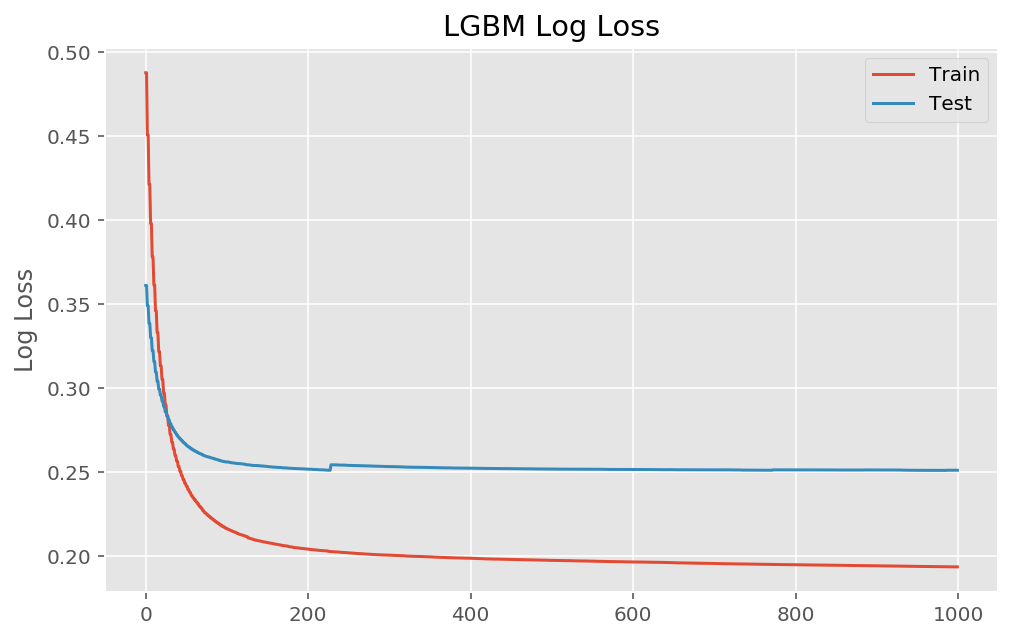

In [39]:
# retrieve performance metrics
results = model4.evals_result_
epochs = len(results['training']['binary_logloss'])
x_axis = range(0, epochs)
# plot log loss
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x_axis, results['training']['binary_logloss'], label='Train')
ax.plot(x_axis, results['valid_1']['binary_logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('LGBM Log Loss')
plt.show()